# Steps:

### Step 1: Importing libraries and Exploring the Dataset.

### Step 2: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Step 3: Definining Exploratory Data Analysis with an overview of the whole project .
### Step 4: creat a model that fits the data

### Step 5: creating an accurecy table


### Step 1: Importing libraries and Exploring the Dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = pd.read_csv('breast-cancer.csv')

In [ ]:
# Get the first 5 rows of the dataset
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Number of rows and columns before cleaning the data
print(dataset.shape)

(569, 32)


### Step 2: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [ ]:
# check if there are any null values
print(dataset.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
#check if there are any duplicated rows
DRows = dataset[dataset.duplicated()]
print(DRows)

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]


In [ ]:
 # Gives information about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# check if there are unnormal values in diagnosis column 
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
# label encoding 
# replacing string values with numeric values
diagnosis = dataset['diagnosis'].replace(['B','M'],[0,1])
print(diagnosis)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [ ]:
# dropping id column from the dataset is not important
# id column is useless in the prediction and may cause overfitting
dataset.drop('id',axis=1,inplace=True)

In [ ]:
# Number of rows and columns after dropping id column
dataset.shape

(569, 31)

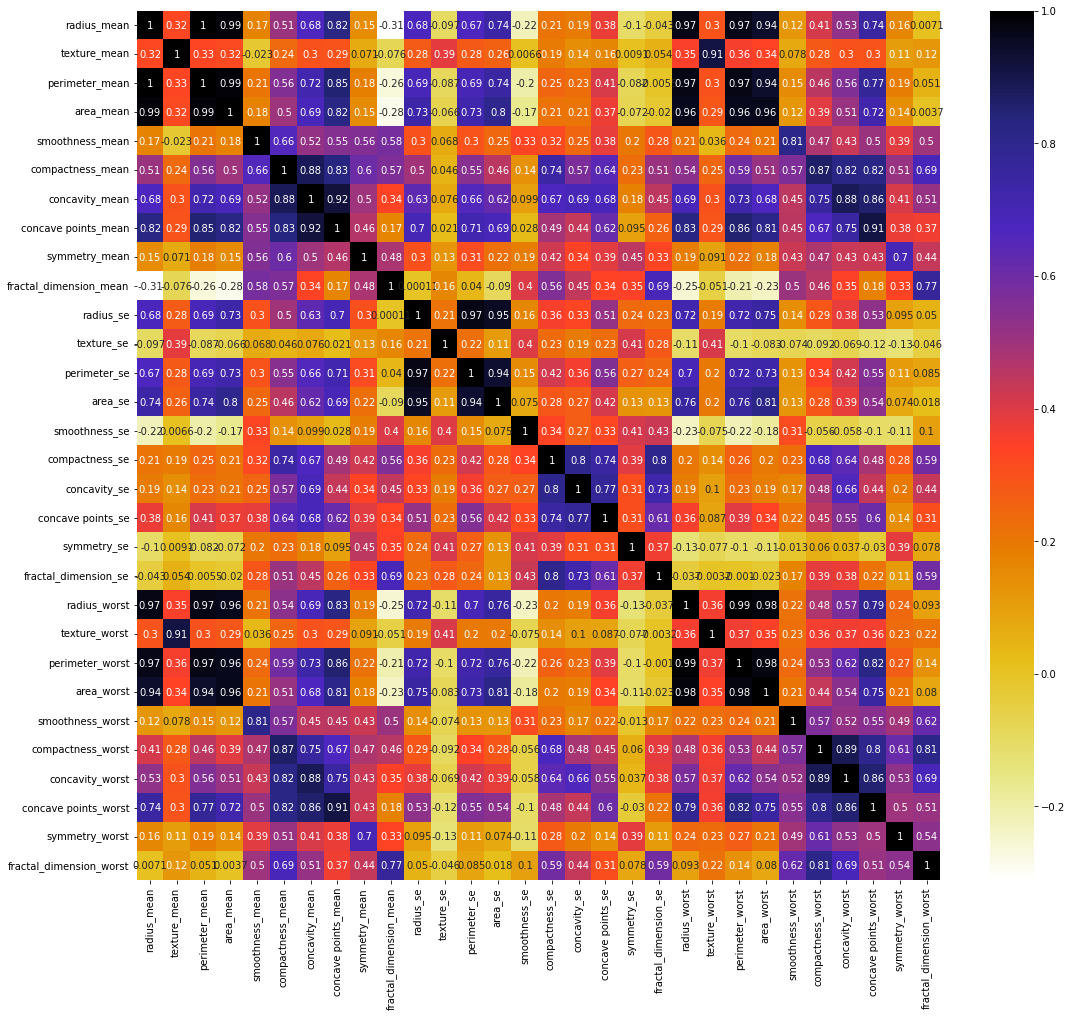

In [ ]:
# Using Pearson Correlation to drop unwanted columns
plt.figure(figsize = (18,16))
cor = dataset.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [ ]:
# Function to select highly correlated features 
# it will remove the first feature that is highly correlated with other features
def correlation(df, threshold):
   highly_cor = set() # set of correlated columns 
   corr_matrix = df.corr()
   for i in range(len(corr_matrix.columns)):
     for j in range(i):
       if abs(corr_matrix.iloc[i, j]) > threshold:
         colname = corr_matrix.columns[i]
         highly_cor.add(colname)
   return highly_cor

In [ ]:
cor_features = correlation(dataset, 0.85)
len(set(cor_features))

13

In [ ]:
cor_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [ ]:
dataset.drop(columns=cor_features,axis=1,inplace=True)

In [ ]:
# dataset shape after dropping
dataset.shape

(569, 18)

###Find Outliers and Drop it

In [ ]:
def find_outliers_IQR(dataset):

   q1=dataset.quantile(0.25)

   q3=dataset.quantile(0.75)

   IQR=q3-q1

   outliers = dataset[((dataset<(q1-1.5*IQR)) | (dataset>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers_IQR(dataset)
print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 569
max outlier value: diagnosis                     None
radius_mean                  28.11
texture_mean                 39.28
smoothness_mean             0.1634
compactness_mean            0.3454
symmetry_mean                0.304
fractal_dimension_mean     0.09744
radius_se                    2.873
texture_se                   4.885
smoothness_se              0.03113
compactness_se              0.1354
concavity_se                 0.396
concave points_se          0.05279
symmetry_se                0.07895
fractal_dimension_se       0.02984
smoothness_worst            0.2226
symmetry_worst              0.6638
fractal_dimension_worst     0.2075
dtype: object
min outlier value: diagnosis                      None
radius_mean                   22.01
texture_mean                  30.62
smoothness_mean             0.05263
compactness_mean             0.2293
symmetry_mean                 0.106
fractal_dimension_mean       0.0795
radius_se                    0.8529
textur

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


In [ ]:
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped

In [ ]:
outliers_dropped=drop_outliers_IQR(dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


###Spliting Data:

In [ ]:
# Separating the features and target
x = dataset.drop(columns=['diagnosis'], axis=1)
y = dataset['diagnosis']

In [ ]:
# Train/ Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print("X shape:",x.shape)
print("X train :",x_train.shape)
print("X test:",x_test.shape)

X shape: (569, 17)
X train : (398, 17)
X test: (171, 17)


In [ ]:
# statistical measures about the data
dataset.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.181162,0.062798,0.405172,1.216853,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,0.132369,0.290076,0.083946
std,3.524049,4.301036,0.014064,0.052813,0.027414,0.007060,0.277313,0.551648,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,0.022832,0.061867,0.018061
min,6.981000,9.710000,0.052630,0.019380,0.106000,0.049960,0.111500,0.360200,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,0.071170,0.156500,0.055040
25%,11.700000,16.170000,0.086370,0.064920,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,0.116600,0.250400,0.071460
50%,13.370000,18.840000,0.095870,0.092630,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,0.131300,0.282200,0.080040
75%,15.780000,21.800000,0.105300,0.130400,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,0.146000,0.317900,0.092080
max,28.110000,39.280000,0.163400,0.345400,0.304000,0.097440,2.873000,4.885000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,0.222600,0.663800,0.207500


### From the output of describe function we noticed the input data points are scaled in different scales, so we need data scaling (Standardization)

###Sacling Data 

In [ ]:
# Data Scaling - Standardization
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)
x_train_scaled

array([[-0.74998027, -1.09978744,  0.58459276, ...,  0.11632807,
         0.07754241,  0.45062841],
       [-1.02821446, -0.1392617 ,  0.74288151, ...,  0.38200132,
        -1.07145262, -0.29541379],
       [-0.53852228, -0.29934933, -0.714814  , ..., -0.47163732,
         0.34900827, -0.13371556],
       ...,
       [-1.3214733 , -0.20855336,  0.31837986, ...,  0.03357739,
        -0.69108476, -0.13148524],
       [-1.24245479, -0.23244704, -1.94083234, ..., -2.67236999,
        -1.55125275, -1.01078909],
       [-0.74441558,  1.13188181, -0.27808094, ..., -0.11885808,
        -1.2308599 ,  0.20083251]])

### Step 3: Definining Exploratory Data Analysis with an overview of the whole project 

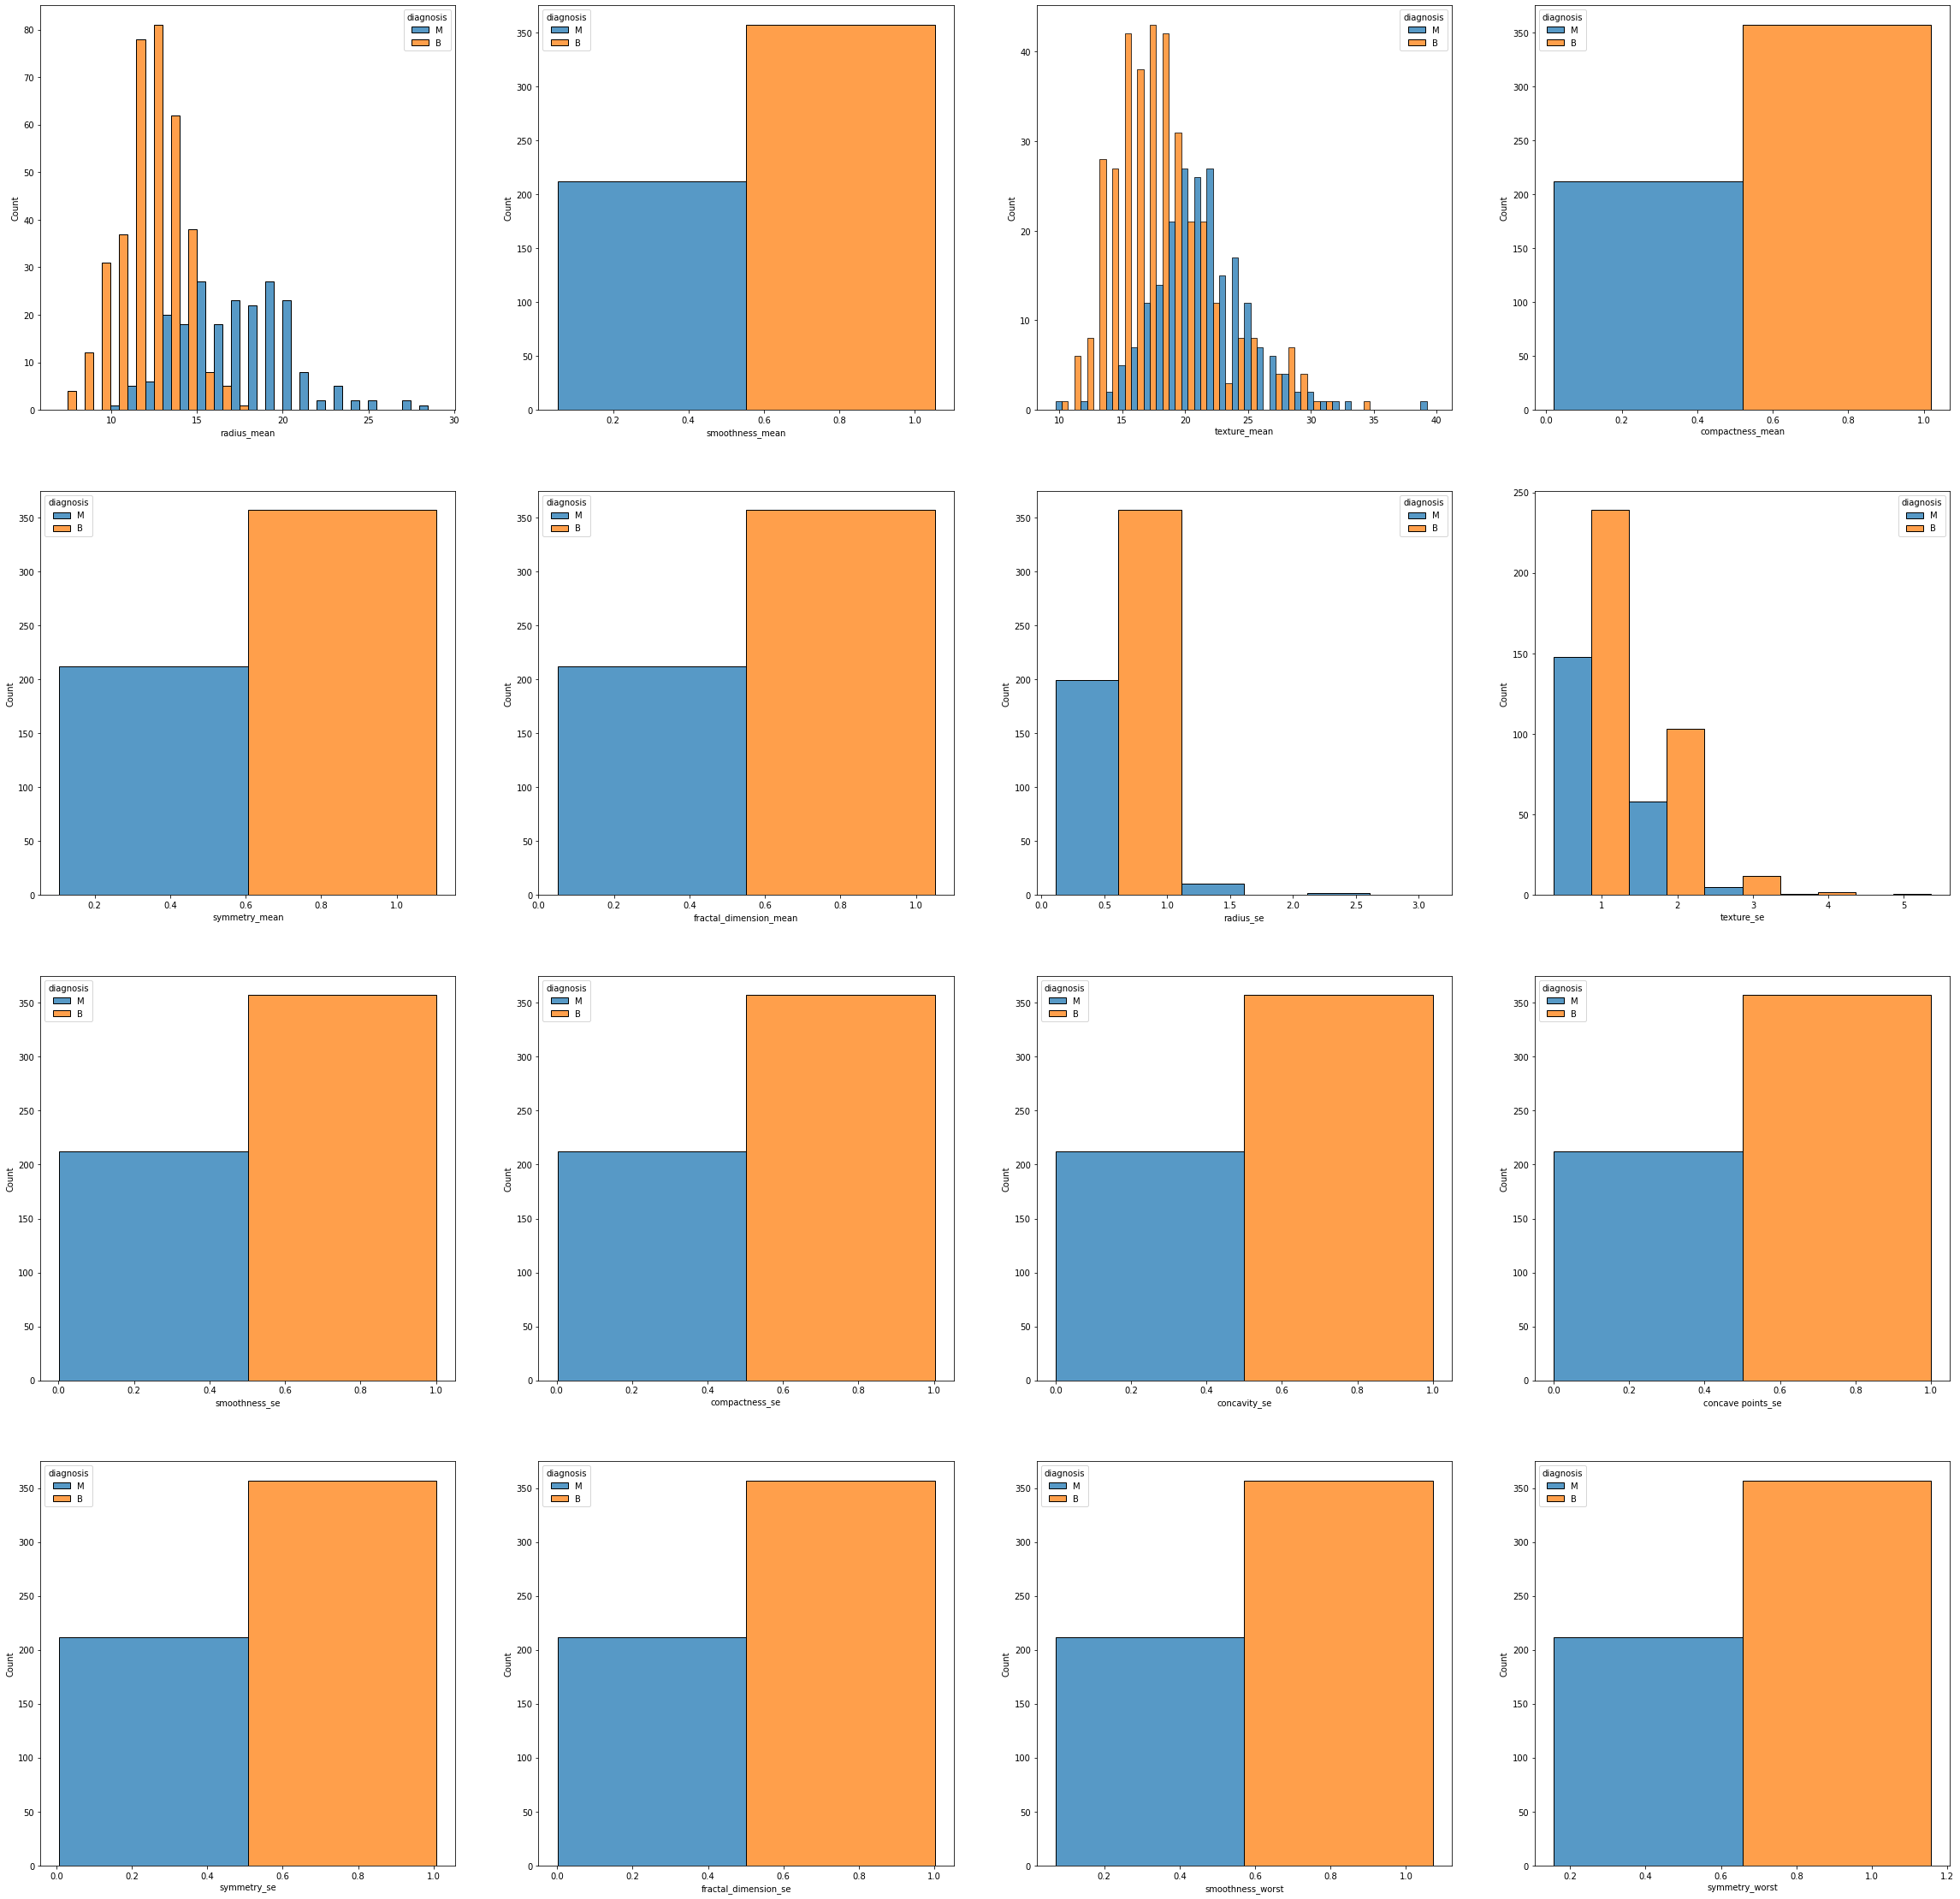

In [ ]:
# histogram between diagnosis and each column in dataset in one figure
fig, axarr1 = plt.subplots(4, 4, figsize=(40, 40))
sns.histplot(binwidth=1, x='radius_mean',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[0][0])
sns.histplot(binwidth=1, x='smoothness_mean',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[0][1])
sns.histplot(binwidth=1, x='texture_mean',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[0][2])
sns.histplot(binwidth=1, x='compactness_mean',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[0][3])
sns.histplot(binwidth=1, x='symmetry_mean',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[1][0])
sns.histplot(binwidth=1, x='fractal_dimension_mean',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[1][1])
sns.histplot(binwidth=1, x='radius_se',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[1][2])
sns.histplot(binwidth=1, x='texture_se',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[1][3])
sns.histplot(binwidth=1, x='smoothness_se',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[2][0])
sns.histplot(binwidth=1, x='compactness_se',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[2][1])
sns.histplot(binwidth=1, x='concavity_se',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[2][2])
sns.histplot(binwidth=1, x='concave points_se',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[2][3])
sns.histplot(binwidth=1, x='symmetry_se',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[3][0])
sns.histplot(binwidth=1, x='fractal_dimension_se',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[3][1])
sns.histplot(binwidth=1, x='smoothness_worst',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[3][2])
sns.histplot(binwidth=1, x='symmetry_worst',hue='diagnosis',data=dataset,stat="count",multiple="dodge",ax=axarr1[3][3])

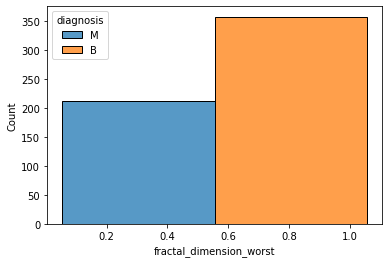

In [ ]:
# histogram between diagnosis and fractal_dimension_worst column 
sns.histplot(binwidth=1, x='fractal_dimension_worst',hue='diagnosis',data=dataset,stat="count",multiple="dodge")

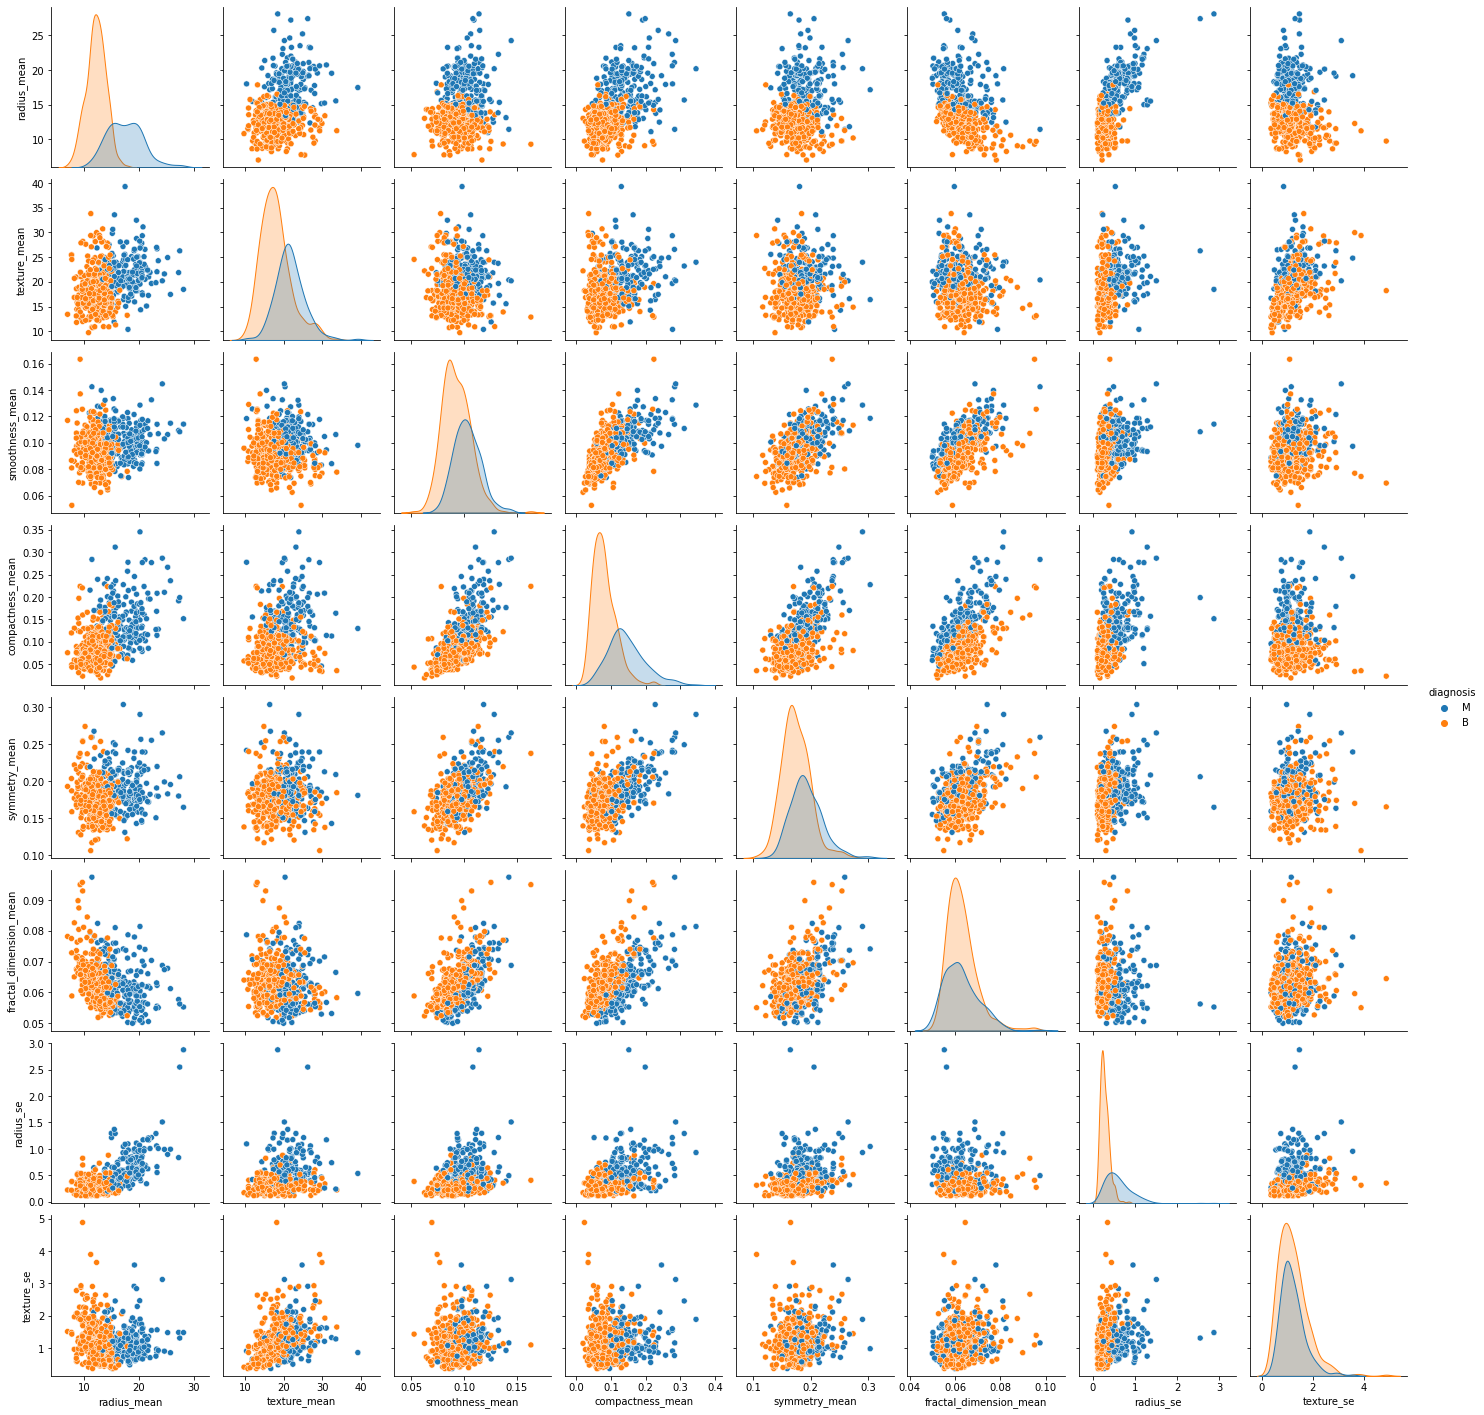

In [ ]:
# relation between "diagnosis", "radius_mean", "texture_mean","smoothness_mean", "compactness_mean", "symmetry_mean","fractal_dimension_mean", "radius_se", "texture_se" columns
cols1 = ["diagnosis", "radius_mean", "texture_mean","smoothness_mean", "compactness_mean", "symmetry_mean","fractal_dimension_mean", "radius_se", "texture_se"]
sns.pairplot(dataset[cols1], hue="diagnosis")

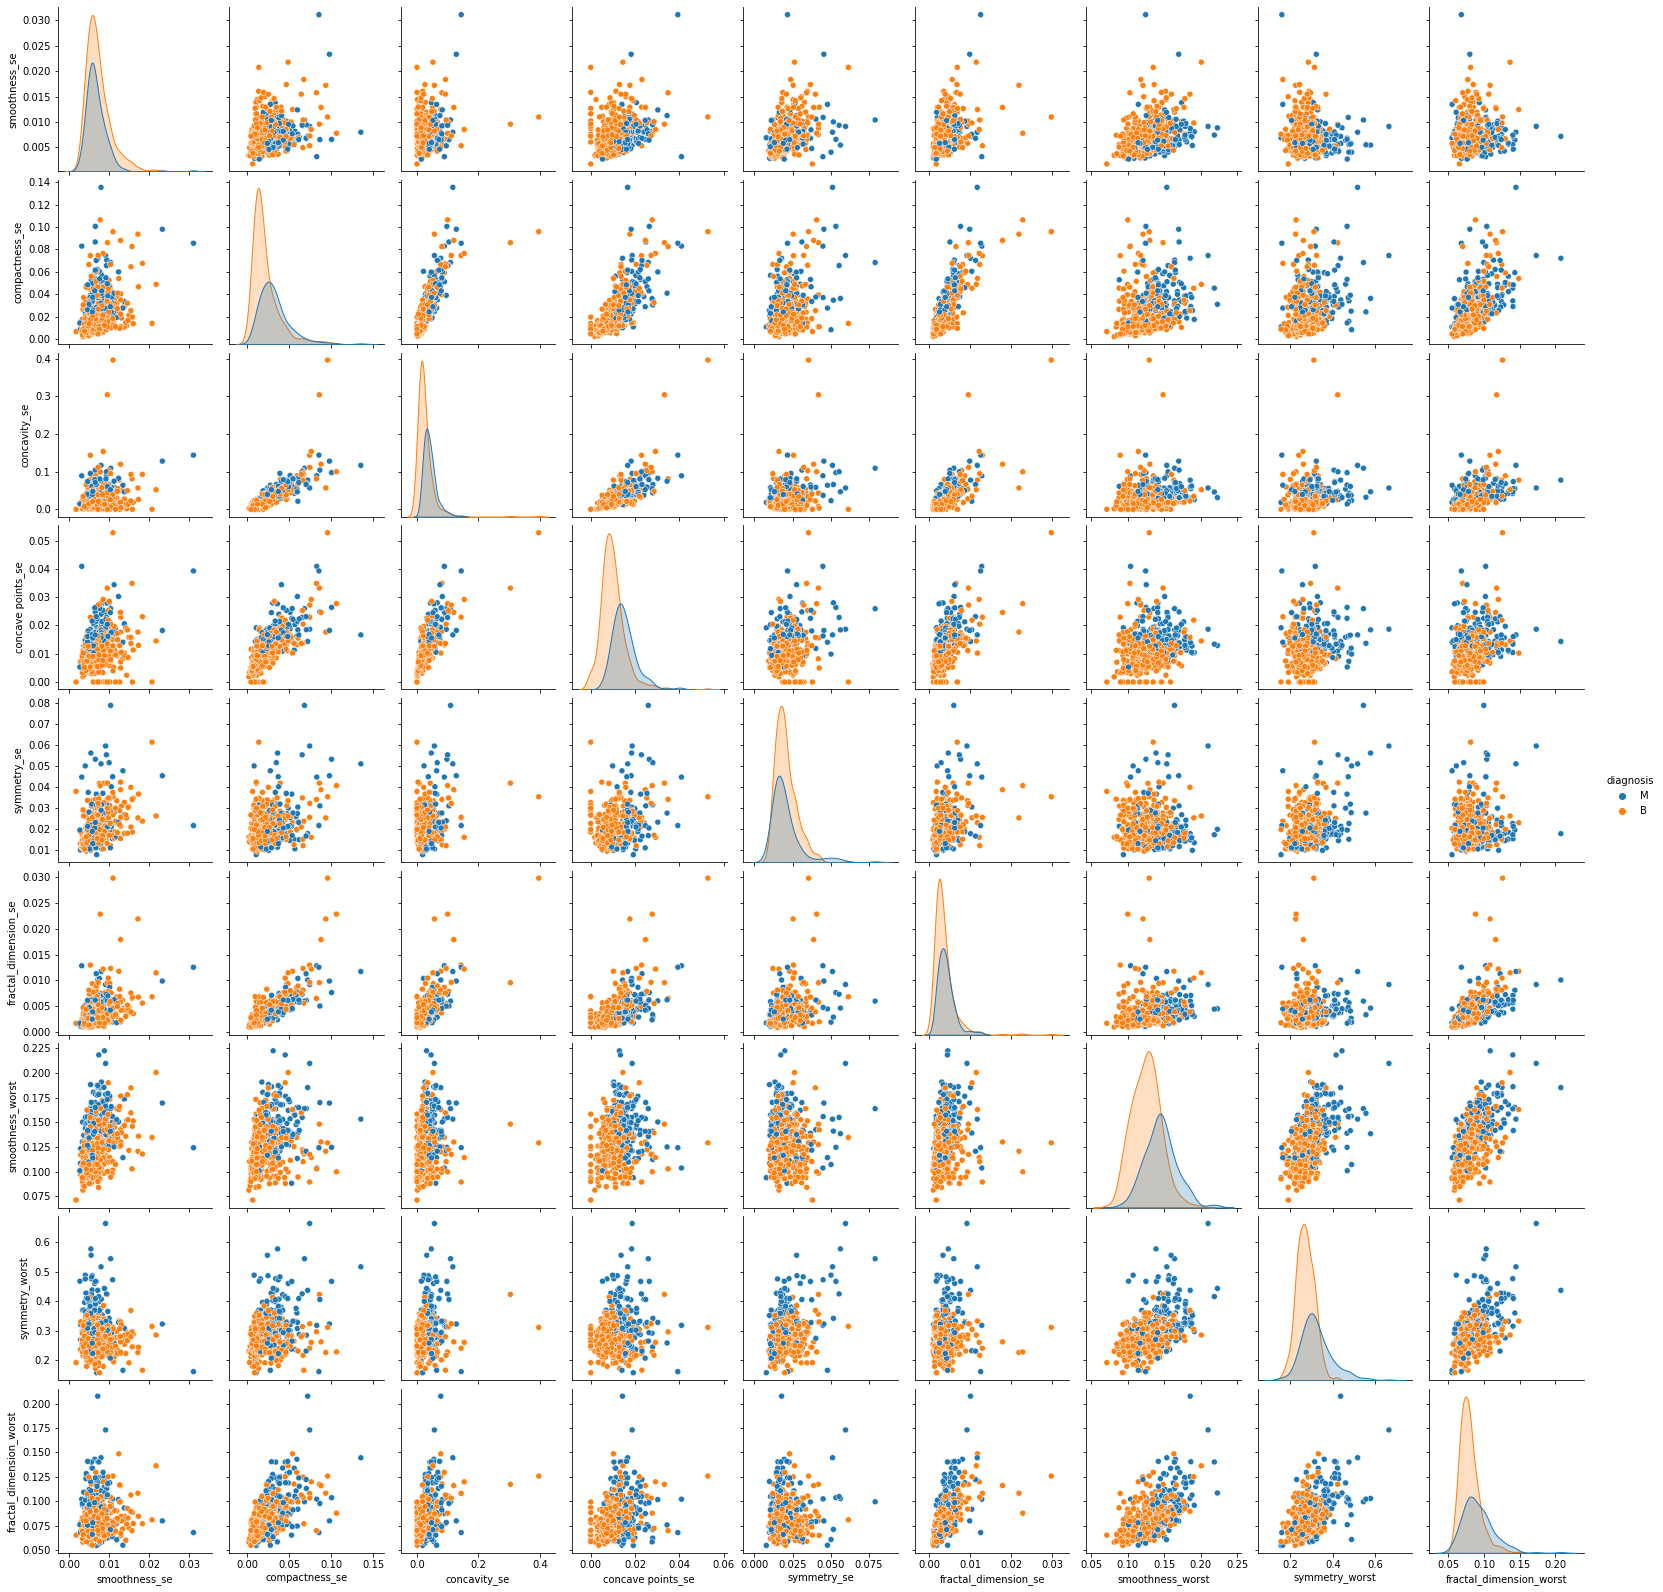

In [ ]:
# relation betwwen "diagnosis","smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se","fractal_dimension_se","smoothness_worst","symmetry_worst","fractal_dimension_worst" columns
cols2 = ["diagnosis","smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se","fractal_dimension_se","smoothness_worst","symmetry_worst","fractal_dimension_worst"]
sns.pairplot(dataset[cols2], hue="diagnosis")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Number of Bengin :  357
Number of Maligant :  212


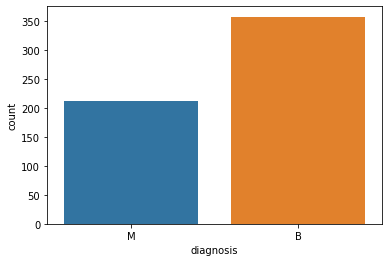

In [ ]:
# checking the distribution of Target Varibale
# count plot for number of Bengin and Maligant in diagnosis column
ax = sns.countplot(dataset['diagnosis'], label = "Count")
B, M = dataset['diagnosis'].value_counts()
print("Number of Bengin : ", B)
print("Number of Maligant : ", M)

### Step 4: creat a model that fits the data

##SVM

In [ ]:
def trainSvm(x_train , y_train):
    #train data
    SV = svm.SVC(kernel='rbf', gamma=1.00)
    SV.fit(x_train , y_train)
    prediction= SV.predict(x_train)
    ac_svm=accuracy_score(y_train,prediction)
    print("SVM train accuracy: ",ac_svm)
    return SV

def testSvm( SV , x_test , y_test):
    y_pre = SV.predict(x_test)
    ac_svm=accuracy_score(y_test,y_pre)
    print("SVM test accuracy: ",ac_svm)
    return SV

##LogisticRegression

In [ ]:
def trainRegression ( x_train , y_train ):  
    #train data
    LR = LogisticRegression()
    LR.fit(x_train , y_train)
    prediction= LR.predict(x_train)
    ac_logisticregression=accuracy_score(y_train,prediction)
    print("LogisticRegression train accuracy: ",ac_logisticregression)    
    return LR

   
    
def testRegression( LR, x_test , y_test ):
    #predict the data :
    pre = LR.predict(x_test)
    #calculate the accuracy :
    ac_logisticregression=accuracy_score(y_test,pre)
    print("LogisticRegression test accuracy: ",ac_logisticregression)  
    return LR
    

##DecisionTree

In [ ]:
def trainDST(x_train , y_train):
    model_DecTree = DecisionTreeClassifier(criterion = "gini", random_state = 10,max_depth=3, min_samples_leaf=5)
    model_DecTree.fit(x_train , y_train)
    prediction= model_DecTree.predict(x_train)
    ac_id3=accuracy_score(y_train,prediction)
    print("Decision Tree train accuracy: ",ac_id3)
    return model_DecTree

def testDST( model_DecTree , x_test , y_test):
    y_predict = model_DecTree.predict(x_test)
    ac=accuracy_score(y_test,y_predict)
    print('Decision Tree test Accuracy : ' , ac)
    return model_DecTree



##KNN

In [ ]:
def trainKNN ( x_train , y_train ):  
    #train data
    knn_model = KNeighborsClassifier(n_neighbors = 9)
    knn_model.fit(x_train , y_train)
    prediction= knn_model.predict(x_train)
    ac_KNN=accuracy_score(y_train,prediction)
    print("KNN train accuracy: ",ac_KNN)    
    return knn_model

   
    
def testKNN( knn_model, x_test , y_test ):
    #predict the data :
    pre = knn_model.predict(x_test)
    #calculate the accuracy :
    ac_KNN=accuracy_score(y_test,pre)
    print("KNN test accuracy: ",ac_KNN)  
    return LR
    

## Accuracy For Each Classification Models

In [ ]:
LR=trainRegression ( x_train , y_train )
LR=testRegression( LR, x_test , y_test )
print("--------------------------------------")
model_DecTree=trainDST(x_train , y_train)
model_DecTree=testDST( model_DecTree , x_test , y_test)
print("--------------------------------------")
SV=trainSvm(x_train , y_train)
SV=testSvm( SV , x_test , y_test)
print("--------------------------------------")
knn_model=trainKNN ( x_train , y_train )
knn_model=testKNN( knn_model, x_test , y_test )

LogisticRegression train accuracy:  0.907035175879397
LogisticRegression test accuracy:  0.9298245614035088
--------------------------------------
Decision Tree train accuracy:  0.9371859296482412
Decision Tree test Accuracy :  0.9181286549707602
--------------------------------------
SVM train accuracy:  0.9422110552763819
SVM test accuracy:  0.8713450292397661
--------------------------------------
KNN train accuracy:  0.9221105527638191
KNN test accuracy:  0.8888888888888888


## Prediction of each classification models as an input

In [ ]:
def predict_for_all(SV,LR,knn_model,model_DecTree , data):
    #Predict of diagnosis value
    radius_mean = input('Enter your radius_mean value : ')
    texture_mean = input('Enter your texture_mean value : ')
    smoothness_mean = input('Enter your smoothness_mean value : ')
    compactness_mean = input('Enter your compactness_mean value : ')
    symmetry_mean = input('Enter your symmetry_mean value : ')
    fractal_dimension_mean = input('Enter your fractal_dimension_mean value: ')
    radius_se = input('Enter your radius_se value: ')
    texture_se = input('Enter your texture_se value: ')
    smoothness_se  = input('Enter your smoothness_se  value: ')
    compactness_se = input('Enter your compactness_se value: ')
    concavity_se = input('Enter your concavity_se value: ')
    concave_points_se = input('Enter your concave points_se value: ')
    symmetry_se = input('Enter your symmetry_se value: ')
    fractal_dimension_se = input('Enter your fractal_dimension_se  value: ')
    smoothness_worst = input('Enter your smoothness_worst  value: ')
    symmetry_worst = input('Enter your symmetry_worst  value: ')
    fractal_dimension_worst = input('Enter your fractal_dimension_worst  value: ')

    # data from dataset: 
    # M
    #input_data = ( 17.99, 10.38, 0.1184, 0.2776, 0.2419, 0.07871, 1.095, 0.9053, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 0.1622, 0.4601, 0.1189 ) 
    # B
    #input_data=(13.54, 14.36,	0.09779,	0.08129,	0.1885,	0.05766,	0.2699,	0.7886,	0.008462,	0.0146,	0.02387,	0.01315,	0.0198,	0.0023,	0.144,	0.2977,	0.07259) 
    #xtest1=np.array(input_data)

    xtest1=np.array([radius_mean , texture_mean , smoothness_mean , compactness_mean, symmetry_mean, fractal_dimension_mean,
       radius_se, texture_se, smoothness_se, compactness_se,
       concavity_se, concave_points_se, symmetry_se,
       fractal_dimension_se, smoothness_worst, symmetry_worst,
       fractal_dimension_worst])
    xtest1 = xtest1.reshape(1,-1)
    ytest1=SV.predict(xtest1)
    ytest2=LR.predict(xtest1)
    ytest3=knn_model.predict(xtest1)
    ytest4=model_DecTree.predict(xtest1)

    print("The Prediction for SVM :")
    
    if ytest1 == "M":
      print('The Breast cancer is Malignant')

    else:
      print('The Breast Cancer is Benign')

    print("--------------------------------------")

    print("The Prediction for LR :")

    if ytest2 == "M" :
      print('The Breast cancer is Malignant')

    else:
      print('The Breast Cancer is Benign')

    print("--------------------------------------")

    print("The Prediction for KNN :")
    if ytest3 == "M" :
      print('The Breast cancer is Malignant')

    else:
      print('The Breast Cancer is Benign')  

    print("--------------------------------------")
   
    print("The Prediction for DecisionTree :")

    if ytest4 == "M" :
      print('The Breast cancer is Malignant')

    else:
      print('The Breast Cancer is Benign')  
    print("--------------------------------------")

In [ ]:
# RUN this cell if you want to write an input and predict the output 
predict_for_all( SV,LR,knn_model,model_DecTree , dataset)

Enter your radius_mean value :  17.99
Enter your texture_mean value : 10.38
Enter your smoothness_mean value : 0.1184
Enter your compactness_mean value : 0.2776
Enter your symmetry_mean value : 0.2419
Enter your fractal_dimension_mean value: 0.07871
Enter your radius_se value: 1.095
Enter your texture_se value: 0.9053
Enter your smoothness_se  value: 0.006399
Enter your compactness_se value: 0.04904
Enter your concavity_se value: 0.05373
Enter your concave points_se value:  0.01587
Enter your symmetry_se value: 0.03003
Enter your fractal_dimension_se  value: 0.006193
Enter your smoothness_worst  value: 0.1622
Enter your symmetry_worst  value: 0.4601
Enter your fractal_dimension_worst  value: 0.1189
The Prediction for SVM :
The Breast cancer is Malignant
--------------------------------------
The Prediction for LR :
The Breast cancer is Malignant
--------------------------------------
The Prediction for KNN :
The Breast cancer is Malignant
--------------------------------------
The Pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base

### Step 5: creating an accurecy table

# Classification Models Table :

|    Classification Models   |  LogisticRegression  |    Decision Tree     |       SVM           |          KNN         |  
|         :----:             |       :----:         |        :----:        |      :----:         |         :----:       |
|      Train Accuracy        |0.907035175879397   |  0.9371859296482412  |        0.9422110552763819         |           0.9221105527638191       |
|      Test Accuracy         |  0.9298245614035088   |  0.9181286549707602  |  0.8713450292397661 |  0.8888888888888888  |

# The factors are more prominent in deciding the type of breast cancer :
  - smoothness_mean
  - compactness_mean
  - symmetry_mean
  - fractal_dimension_mean
  - smoothness_se
  - symmetry_se
  - concave points_se
  - concavity_se
  - compactness_se
  - fractal_dimension_se
  - symmetry_worst
  - smoothness_worst
  - fractal_dimension_worst


